# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Load dataset

### Feature Description
ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [4]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

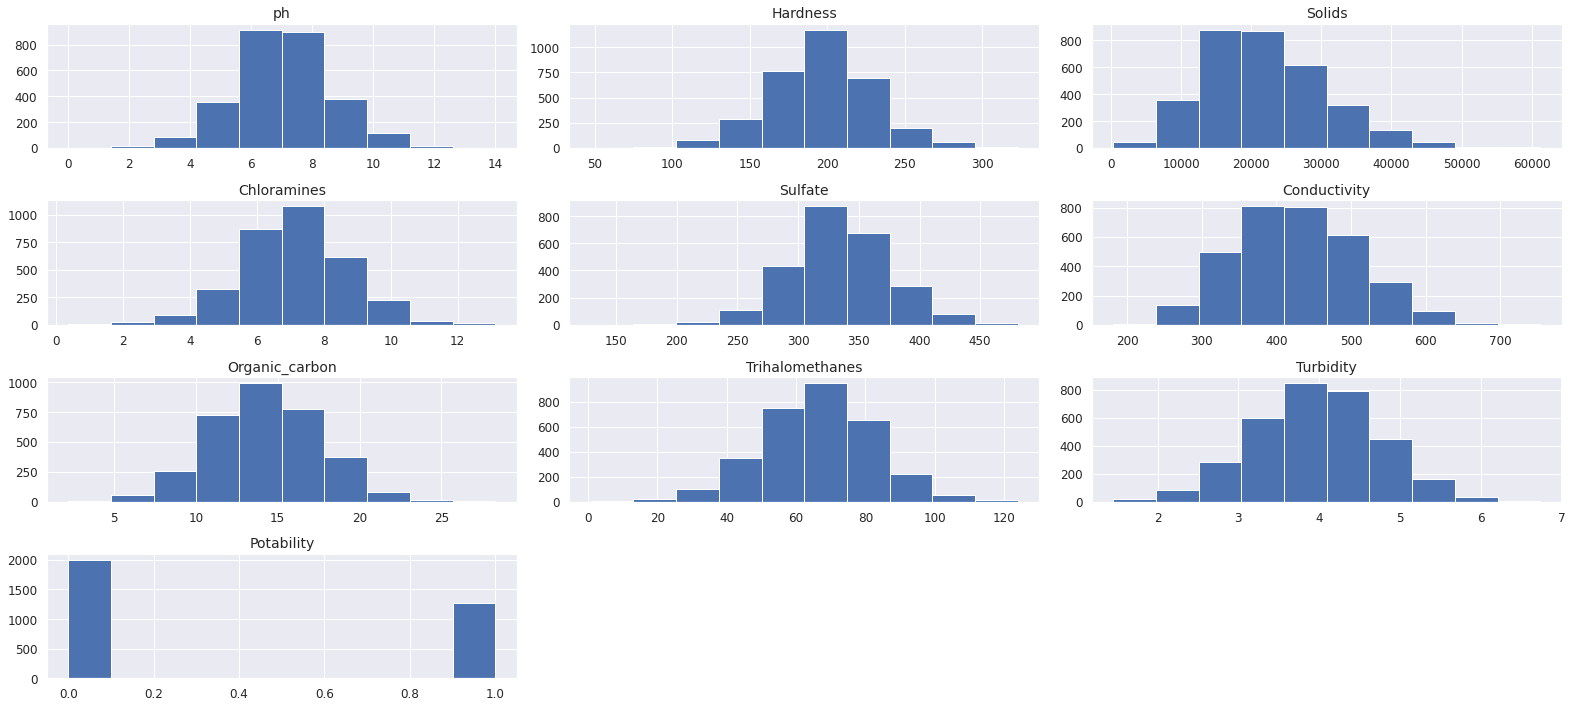

In [5]:
def display_dataset_distributions(dataset,bins=10):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10),bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
    
display_dataset_distributions(df)

0    1998
1    1278
Name: Potability, dtype: int64


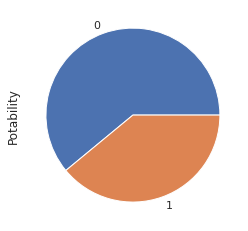

In [6]:
df.Potability.value_counts().plot(kind ='pie')
print(df.Potability.value_counts())

0    1998
1    1998
Name: Potability, dtype: int64


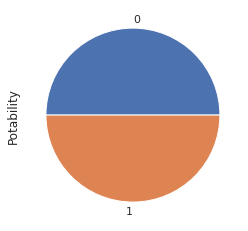

In [7]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# Add extra samples of minority class (Potability=1)
df_upsampled = resample(df[df['Potability']==1], replace = True, 
                            n_samples = df.Potability.value_counts().max()-df.Potability.value_counts().min()) 

df = pd.concat([df, df_upsampled]) 
df = shuffle(df)

df.Potability.value_counts().plot(kind ='pie')
print(df.Potability.value_counts())

# Split into Train Test

In [8]:
from sklearn.model_selection import train_test_split

df = df[df['Potability'].notna()]

y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Potability'], axis=1),
    y,
    test_size=0.15,
    random_state=0,
    stratify=y
    )

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("% of Potability in original dataset: "+str((df['Potability']==1).sum()/df.shape[0]*100))
print("% of Potability in y_train: "+str((y_train==1).sum()/y_train.shape[0]*100))
print("% of Potability in y_test: "+str((y_test==1).sum()/y_test.shape[0]*100))

X_train.shape, X_test.shape = 
(3396, 9) (600, 9)
% of Potability in original dataset: 50.0
% of Potability in y_train: 50.0
% of Potability in y_test: 50.0


In [9]:
# Join it to work easier
X_train['Potability']=y_train

In [10]:
print('% of NaN in each column')
print(((1-df.count()/df.count().max())*100))

% of NaN in each column
ph                 14.539540
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.923924
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.704705
Turbidity           0.000000
Potability          0.000000
dtype: float64


# Exploring Features

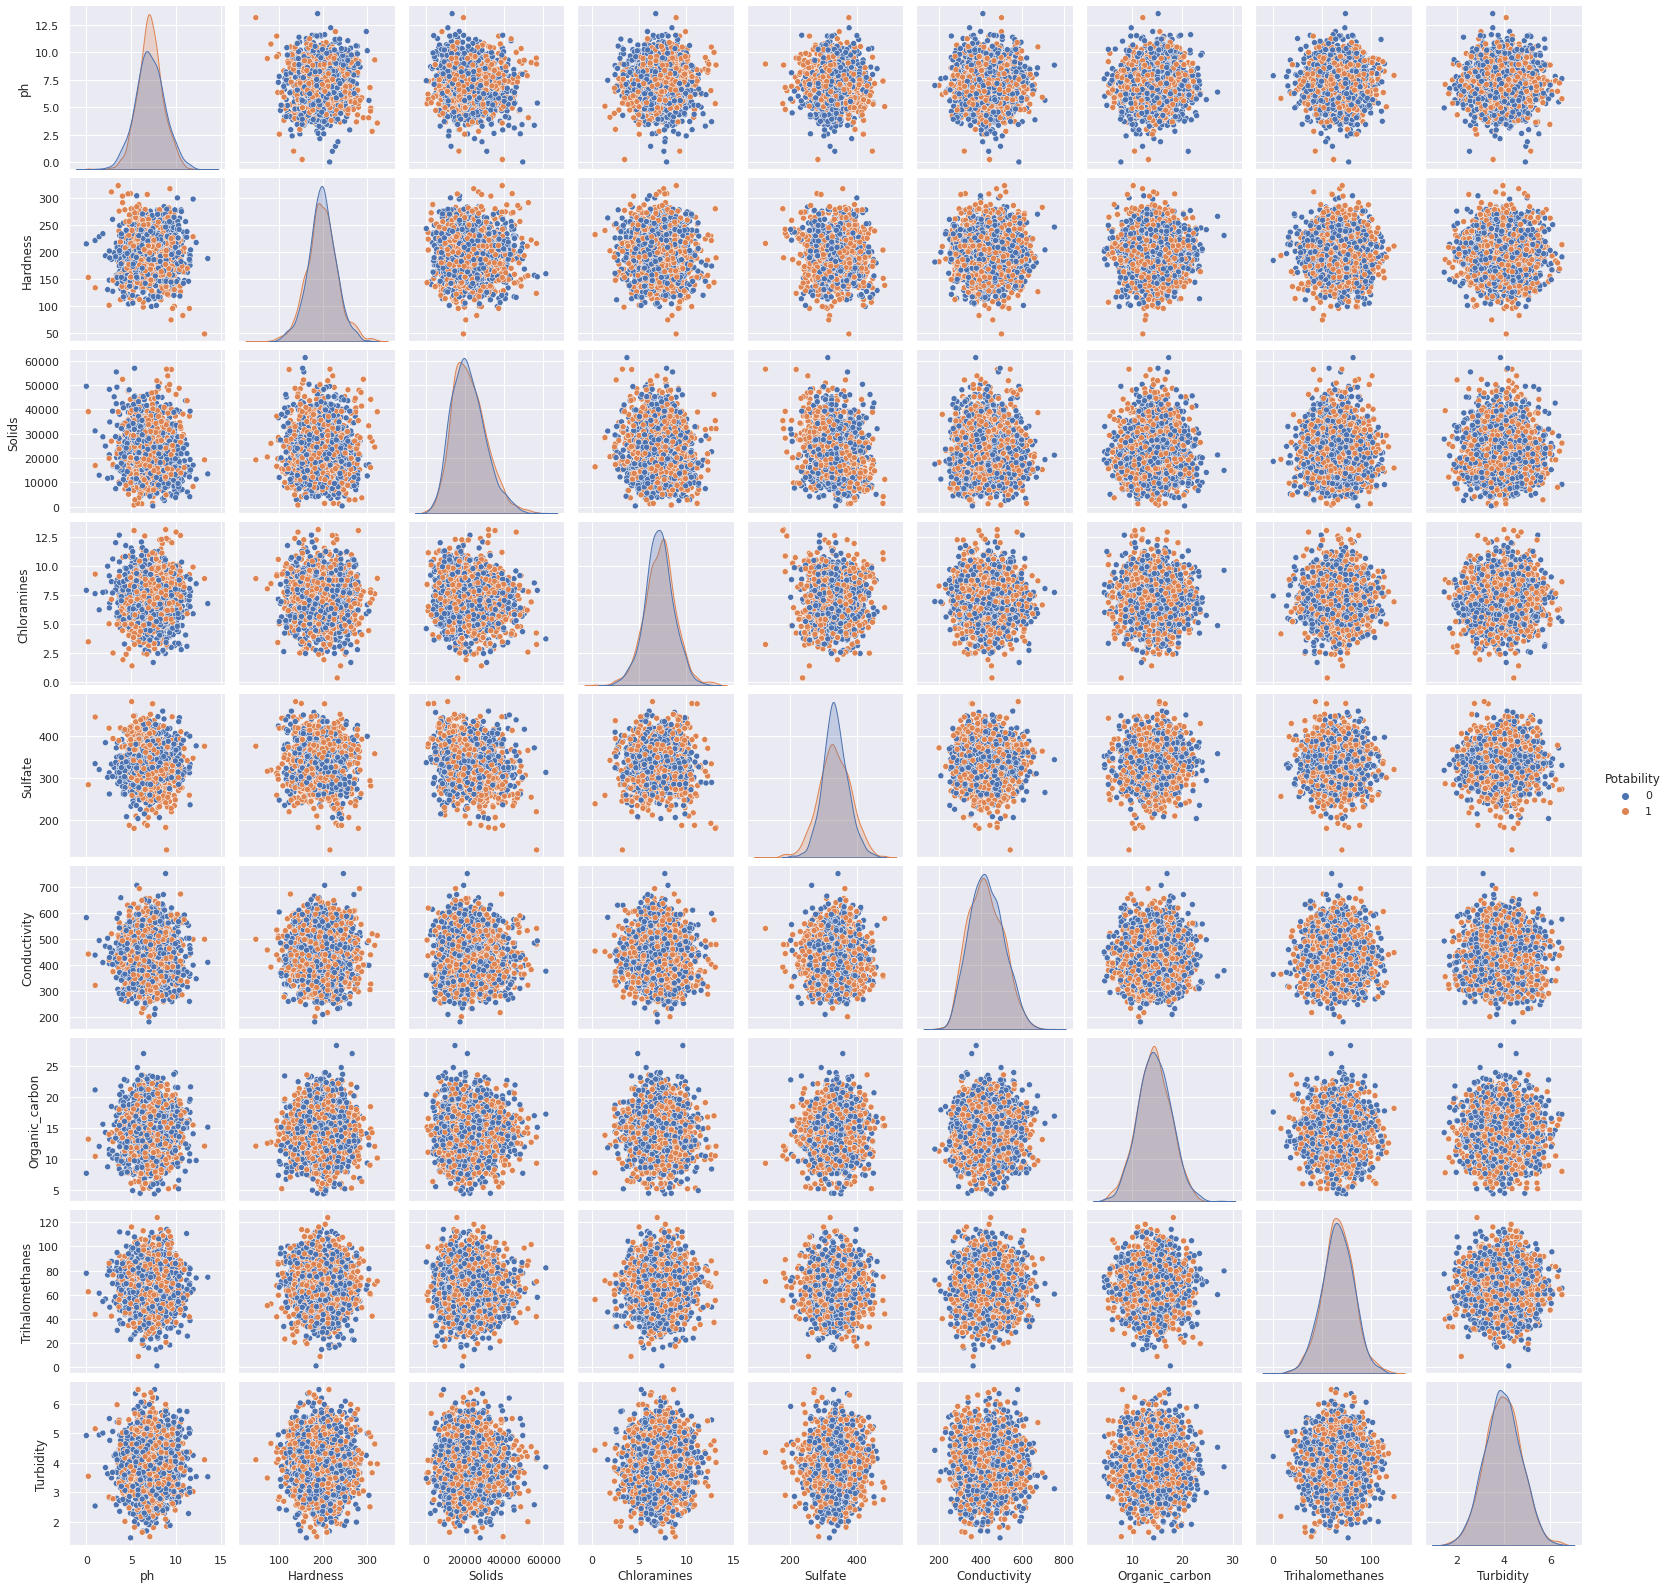

In [11]:
sns.pairplot(X_train,hue="Potability")

# Outliers

In [12]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)

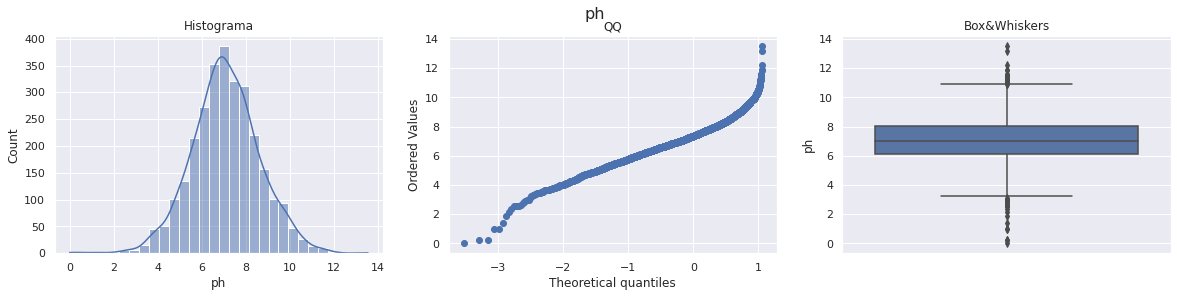

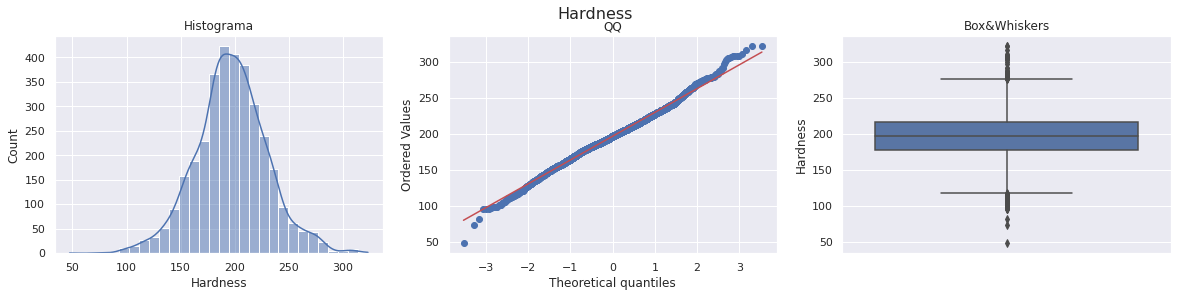

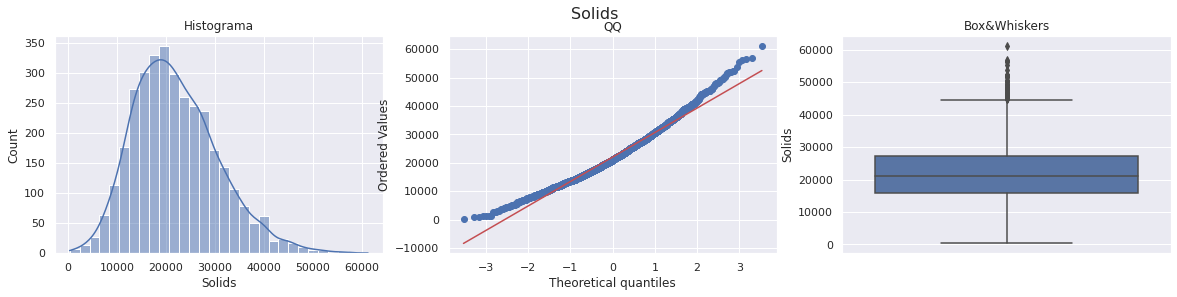

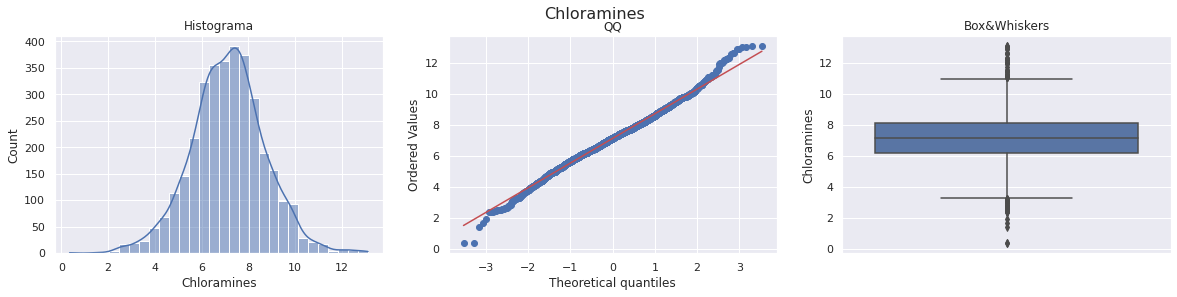

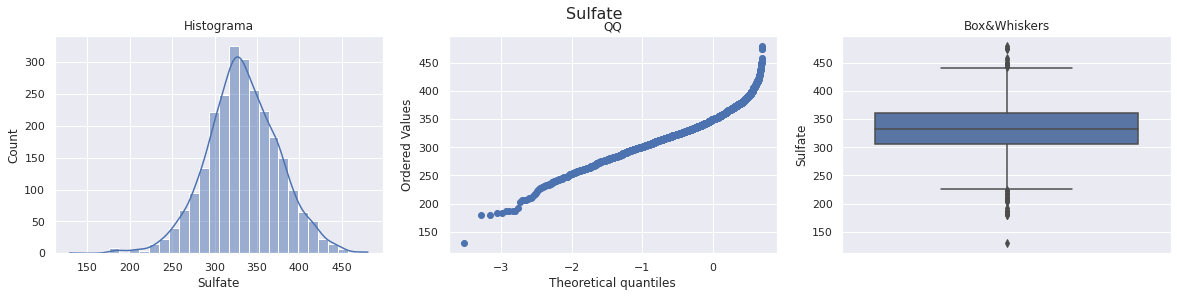

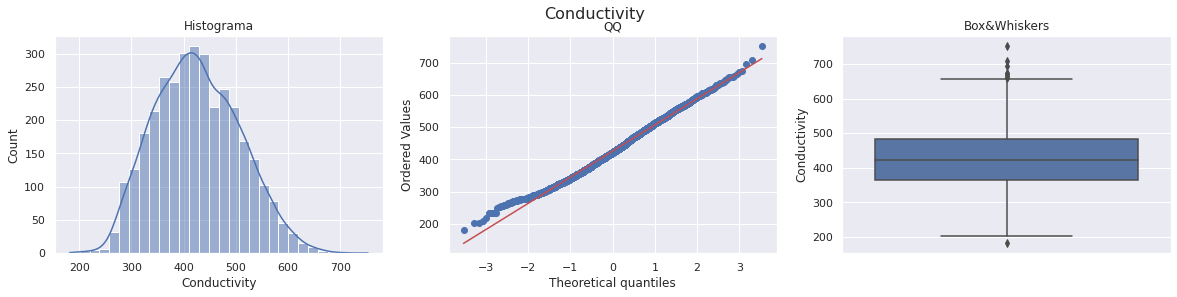

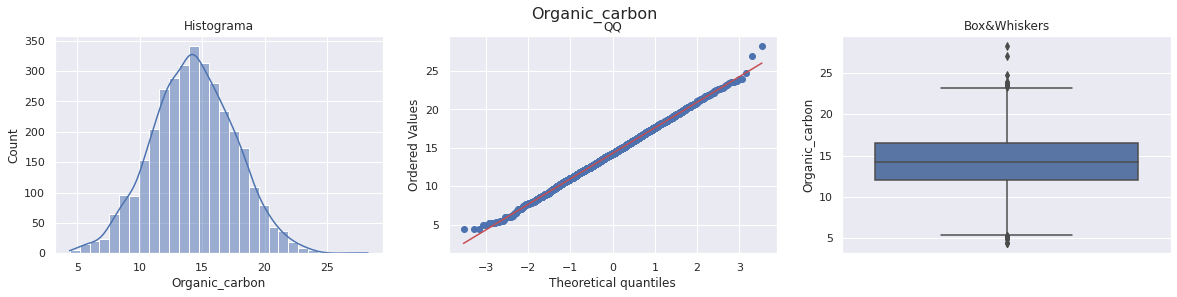

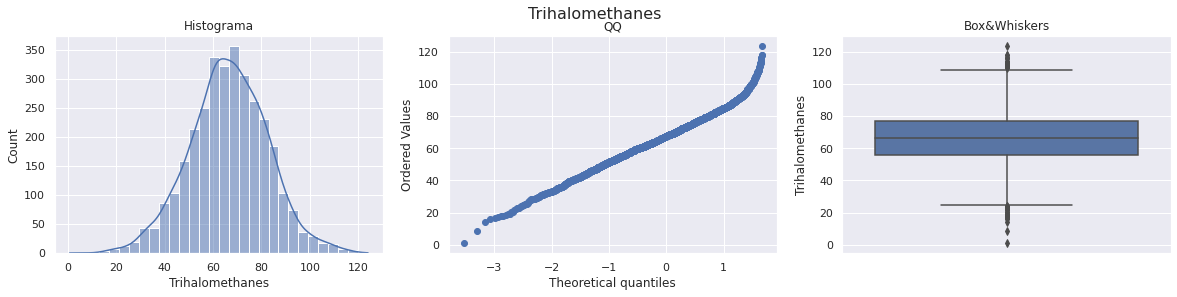

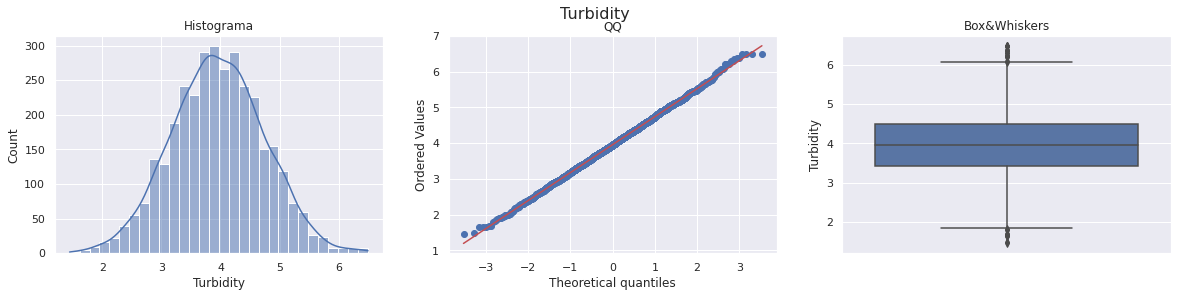

In [13]:
norm_col = [
    'ph', 
    'Hardness', 
    'Solids', 
    'Chloramines',
    'Sulfate', 
    'Conductivity',
    'Organic_carbon', 
    'Trihalomethanes', 
    'Turbidity'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [14]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary
    
def transform_outliers(df, norm_col, threshold_capped=1.5, threshold_trimmed=1.8, use_manual_limits=False, 
                        upper_limit_trim=0, lower_limit_trim=0, upper_limit_cap=0, lower_limit_cap=0):
    # Trimming and capping outliers
    outliers_total = np.array(np.repeat(False,df.shape[0]))
    X_train_capped = df.copy()
    for col in norm_col:
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_trim, lower_limit_trim
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_trimmed)

        outliers = np.where(df[col] > upper_limit, True,
                            np.where(df[col] < lower_limit, True, False))                        
        outliers_total = np.logical_or(outliers_total, outliers)
        
        print(str(col) + " outliers = "+str(outliers.sum()))
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_cap, lower_limit_cap
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_capped)

        X_train_capped[col] = np.where(df[col] > upper_limit, upper_limit,
                            np.where(df[col] < lower_limit, lower_limit, X_train_capped[col]))

    print("Total outliers = "+str(outliers_total.sum()))
    X_train_trimmed = X_train_capped.loc[~(outliers_total)]

    return X_train_trimmed

ph outliers = 26
Hardness outliers = 34
Solids outliers = 22
Chloramines outliers = 42
Sulfate outliers = 19
Conductivity outliers = 3
Organic_carbon outliers = 3
Trihalomethanes outliers = 12
Turbidity outliers = 6
Total outliers = 150


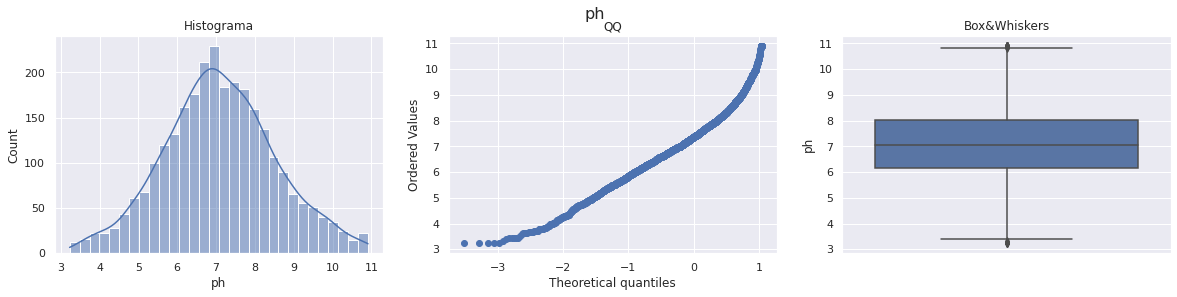

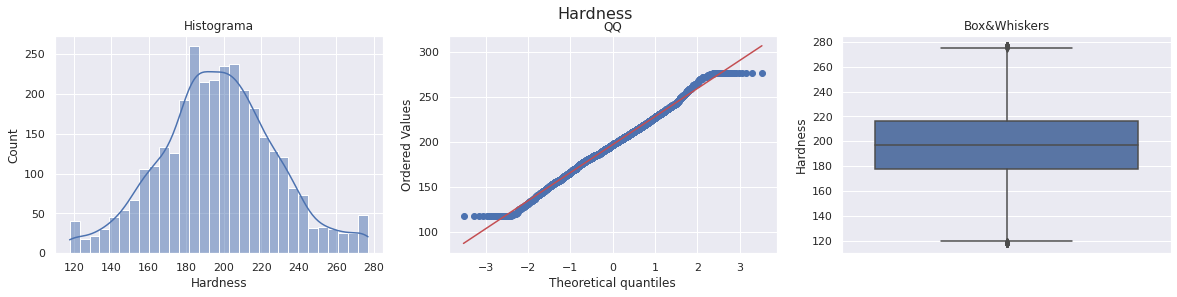

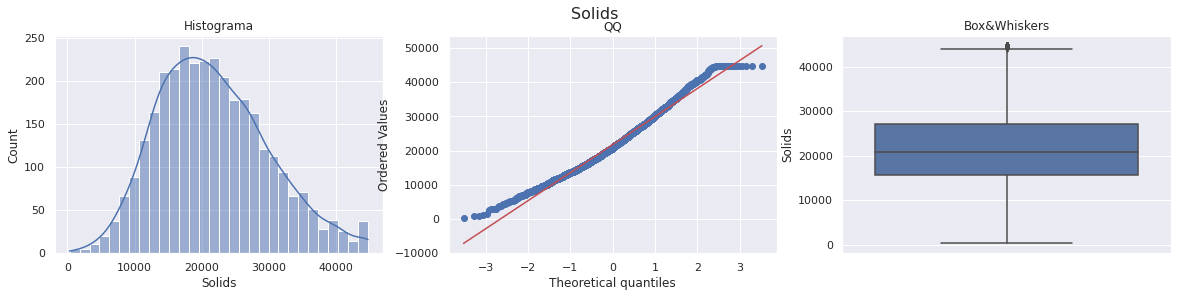

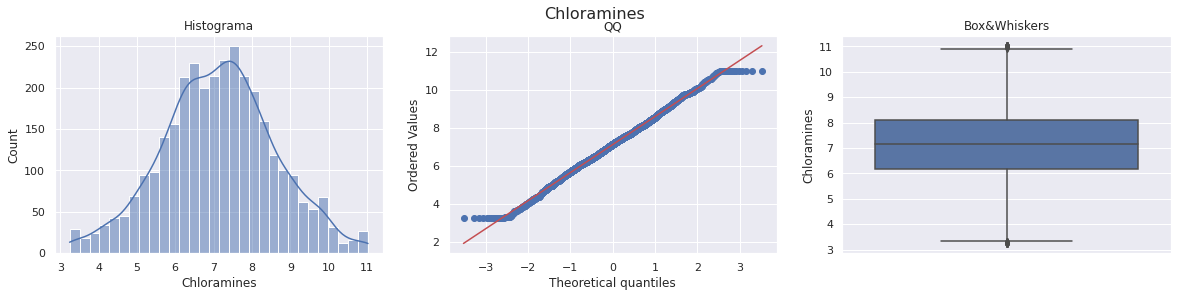

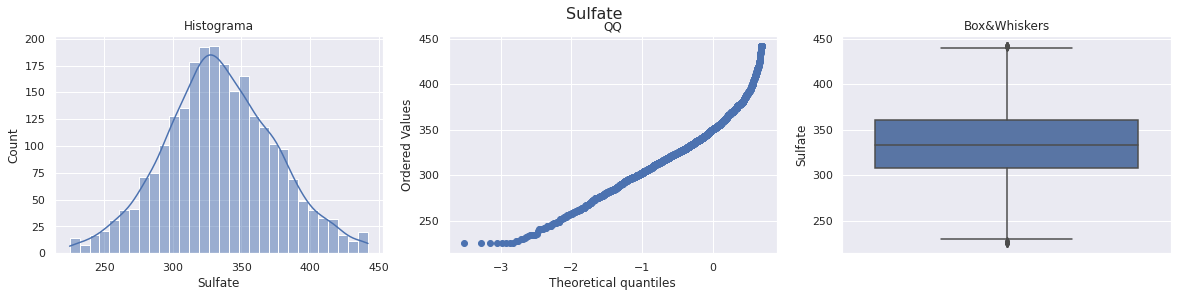

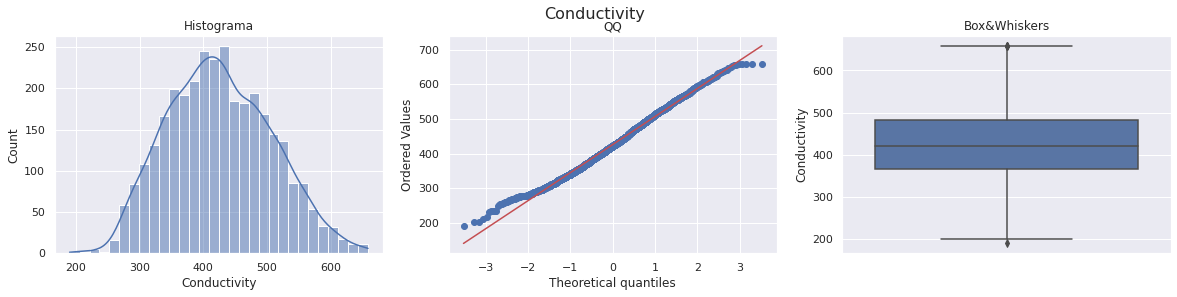

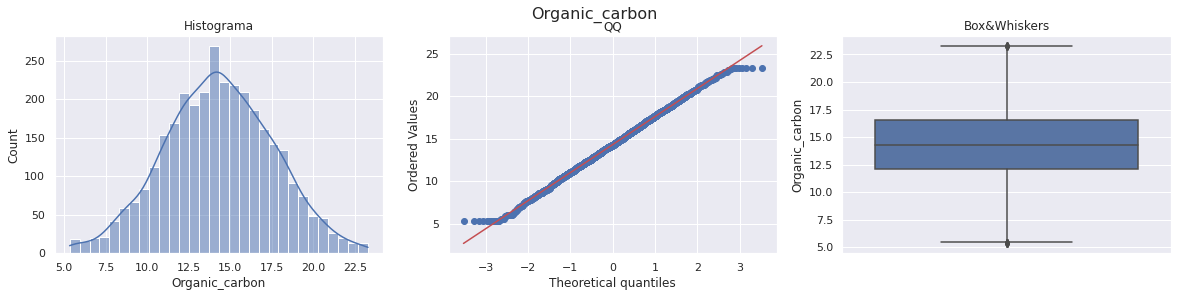

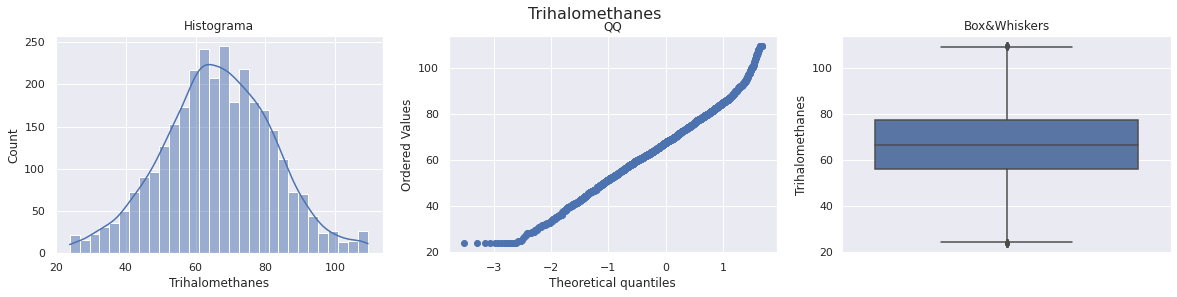

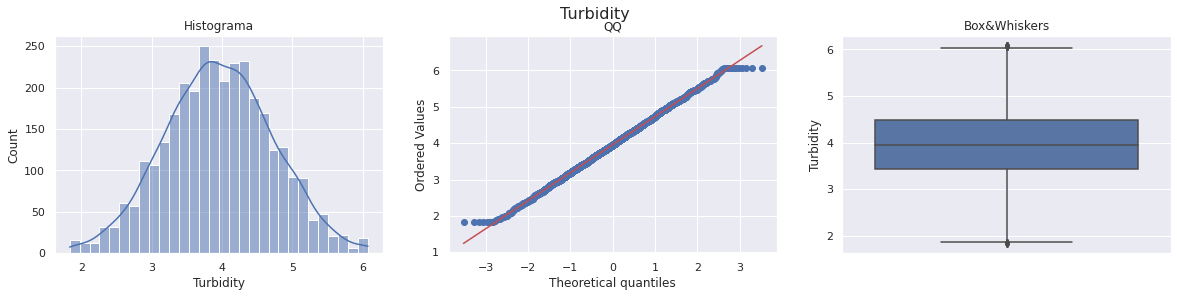

In [15]:
X_train_trimmed = transform_outliers(X_train, norm_col)

for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

# Scaled

In [16]:
scaled_columns = [
    'ph', 
    'Hardness', 
    'Solids', 
    'Chloramines',
    'Sulfate', 
    'Conductivity',
    'Organic_carbon', 
    'Trihalomethanes', 
    'Turbidity'
]

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])
X_train[scaled_columns].head(3)

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
372  -0.540109 -0.515152  1.756551     1.912071 -1.452408     -1.455522   
2733 -0.074570  0.927848 -0.490300     0.077411  1.076521      1.247422   
1253       NaN -0.018731 -0.435993     0.591074 -0.266518     -1.385699   

      Organic_carbon  Trihalomethanes  Turbidity  
372         1.174702         1.713797  -1.697776  
2733       -0.161443         1.350255   1.587686  
1253        1.297053         0.094823  -0.595895

# Imputation

In [18]:
# The column with %NaN <= 10% will be imputed with a simple imputer (using mean).
# The column with %NaN > 10% will be imputed using KNN algorithm.
print("Percentage of NaN for each column:\nColumns with %NaN <= 10%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[(((1-X_train.count()/X_train.count().max())*100)>0) & (((1-X_train.count()/X_train.count().max())*100)<10)])
print("\nColumns with %NaN > 10%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[((1-X_train.count()/X_train.count().max())*100)>10])


Percentage of NaN for each column:
Columns with %NaN <= 10%:

Trihalomethanes    4.682686
dtype: float64

Columns with %NaN > 10%:

ph         14.879852
Sulfate    24.430068
dtype: float64


### Median imputation

In [19]:
from sklearn.impute import SimpleImputer

imputed_by_median_col = [
    'Trihalomethanes',
]

In [20]:
imputer_median = SimpleImputer(strategy='median',add_indicator=True) # Create imputer
X_imputed_median = imputer_median.fit_transform(X_train[imputed_by_median_col]) # Fit-transform
imputed_median_cols = [str(d) + "_imputed" for d in imputed_by_median_col] # Name of indicators of imputation
median_cols = imputed_by_median_col + imputed_median_cols

assert(not np.isnan(np.sum(X_imputed_median))) # Check not nan

# Replace in dataset
X_train.drop(imputed_by_median_col,axis=1,inplace=True)
X_train[median_cols]=X_imputed_median

print("NaN:")
print(X_train[imputed_by_median_col].isna().sum())

NaN:
Trihalomethanes    0
dtype: int64


### KNN Imputation

In [21]:
from sklearn.impute import KNNImputer

imputed_by_knn_col = [
    'ph',
    'Sulfate',
]

neighbors_col =[
    'Hardness', 
    'Solids', 
    'Chloramines',
    'Conductivity',
    'Organic_carbon', 
    'Trihalomethanes', 
    'Turbidity'
]

In [25]:
imputer_knn = KNNImputer(n_neighbors=5,add_indicator=True)
X_imputed_knn = imputer_knn.fit_transform(X_train[imputed_by_knn_col]) # Fit-transform
imputed_knn_cols = [str(d) + "_imputed" for d in imputed_by_knn_col]  # Name of indicators of imputation
knn_cols = imputed_by_knn_col + imputed_knn_cols

assert(not np.isnan(np.sum(X_imputed_knn))) # Check not nan

# Replace in dataset
X_train.drop(imputed_by_knn_col,axis=1,inplace=True)
X_train[knn_cols]=X_imputed_knn

print("NaN:")
print(X_train[imputed_by_knn_col].isna().sum())

NaN:
ph         0
Sulfate    0
dtype: int64


# CHECKEAR QUE NO SE ALTERE LA DISTRIBUCION DESPUES DE IMPUTAR!

display_dataset_distributions(X_train_imputed[imputed_by_mean_col])

# Normalization

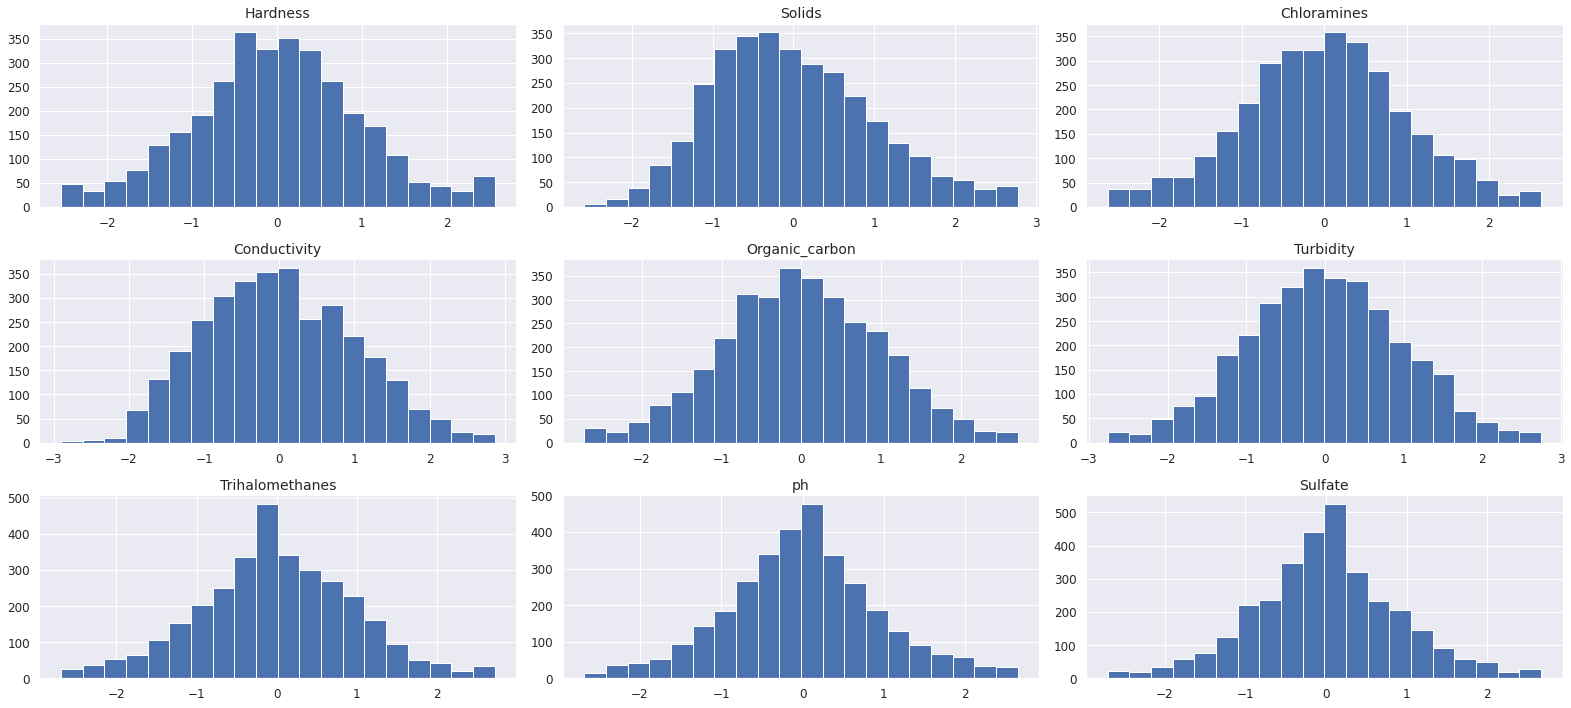

In [29]:
norm_col_yj = [
    'Hardness',
    'Solids',
    'Chloramines',
    'Conductivity',
    'Organic_carbon',
    'Turbidity',
    'Trihalomethanes',
    'ph',
    'Sulfate'
]

norm_col_qt = [
    
]

display_dataset_distributions(X_train[norm_col_yj+norm_col_qt],bins=20)

In [30]:
from sklearn.preprocessing import PowerTransformer

X_transformed = X_train.copy()
power = PowerTransformer(method= 'yeo-johnson')
X_transformed[norm_col_yj] = power.fit_transform(X_train[norm_col_yj])
display_dataset_distributions(X_transformed[norm_col_yj],bins=20)


# from sklearn.preprocessing import QuantileTransformer

# power = QuantileTransformer(output_distribution= 'normal')
# X_transformed[norm_col_qt] = power.fit_transform(X_train[norm_col_qt])
# display_dataset_distributions(X_transformed[norm_col_qt],bins=30)

# Correlation

In [32]:
X_train

Hardness    Solids  Chloramines  Conductivity  Organic_carbon  \
372  -0.515152  1.756551     1.912071     -1.455522        1.174702   
2733  0.927848 -0.490300     0.077411      1.247422       -0.161443   
1253 -0.018731 -0.435993     0.591074     -1.385699        1.297053   
2708 -0.691244  0.425178     0.332929     -0.607955        0.434910   
1177 -0.007201 -0.285056    -1.441593     -0.954277        1.331338   
...        ...       ...          ...           ...             ...   
3077  0.927709 -1.472814    -0.835418     -0.657111        0.292161   
3139 -1.088637  1.600755     0.380568     -0.263580       -1.832623   
2437  0.998012 -0.739382    -0.546617     -0.286877        0.100676   
506   0.683230  2.455105    -0.543475      0.951084        0.421801   
417   0.368315 -0.250188     0.591441      0.701163       -0.896783   

      Turbidity  Potability  Trihalomethanes  Trihalomethanes_imputed  \
372   -1.697776           1         1.713797                      0.0   
2733   1.587686           1         1.350255                      0.0   
1253  -0.595895           0         0.094823                      0.0   
2708   2.085860           0         0.009330                      1.0   
1177   0.619973           1         0.628574                      0.0   
...         ...         ...              ...                      ...   
3077   1.070966           0        -0.328799                      0.0   
3139   0.525722           1         0.071690                      0.0   
2437  -0.611352           1         0.876571                      0.0   
506    0.476121           0        -1.134830                      0.0   
417    0.117513           0         1.223293                      0.0   

            ph   Sulfate  ph_imputed  Sulfate_imputed  
372  -0.540109 -1.452408         0.0              0.0  
2733 -0.074570  1.076521         0.0              0.0  
1253 -0.266441 -0.266518         1.0              0.0  
2708 -0.447022 -1.753835         0.0              0.0  
1177 -1.119606 -0.957897         0.0              0.0  
...        ...       ...         ...              ...  
3077  2.171349 -0.503021         0.0              0.0  
3139  0.873934 -0.421069         0.0              0.0  
2437  0.401899 -0.193507         1.0              0.0  
506  -0.417581 -0.242052         1.0              0.0  
417   1.962754  0.146060         0.0              0.0  

[3246 rows x 13 columns]

In [33]:
drop_for_plot = imputed_median_cols + imputed_knn_cols

In [34]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(X_train.drop(drop_for_plot,axis=1).corr(), annot=True)

# fig = plt.figure(figsize=(25,20))
# sns.heatmap(X_train.drop(drop_for_plot,axis=1).corr(method='kendall'),annot=True)

<AxesSubplot:>

In [48]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

def select_features_mi(X_train, y_train, k='all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs

def select_features_continouos(X, y):
  return mutual_info_regression(X, y, discrete_features='auto')

mi_cols = [ 'Hardness',
            'Solids',
            'Chloramines',
            'Conductivity',
            'Organic_carbon',
            'Turbidity',
            'Trihalomethanes',
            'ph',
            'Sulfate']

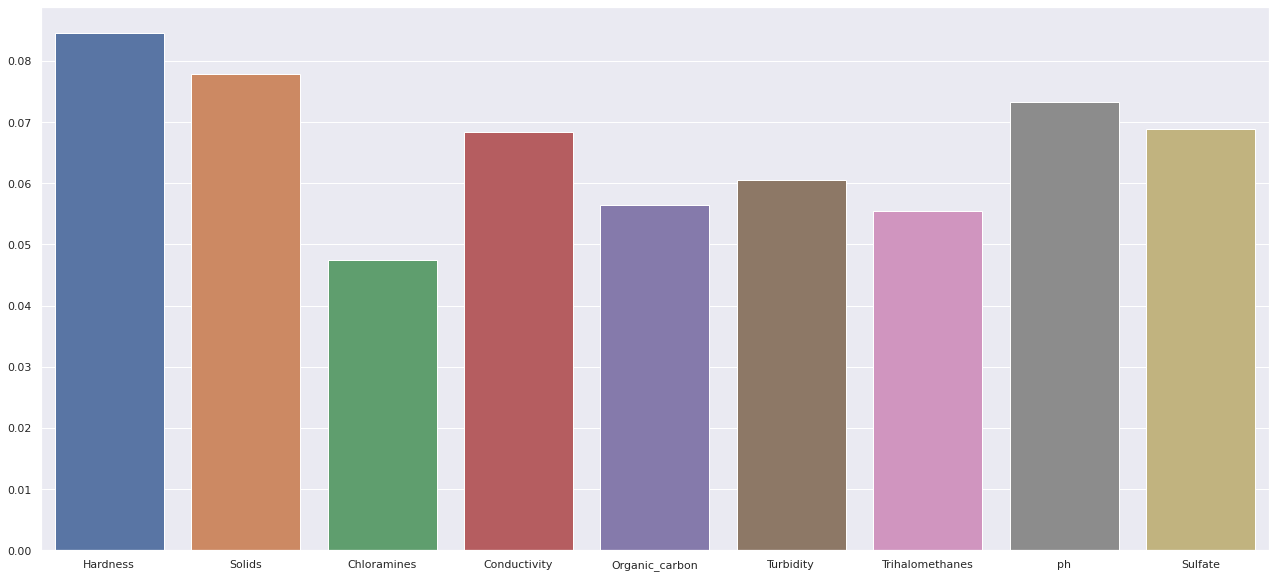

In [49]:
X_train_mi, mi = select_features_mi(X_train.drop(drop_for_plot+['Potability'],axis=1), X_train['Potability'])

plt.figure(figsize=(22,10))
sns.barplot(x=X_train[mi_cols].columns.values,y=mi.scores_);

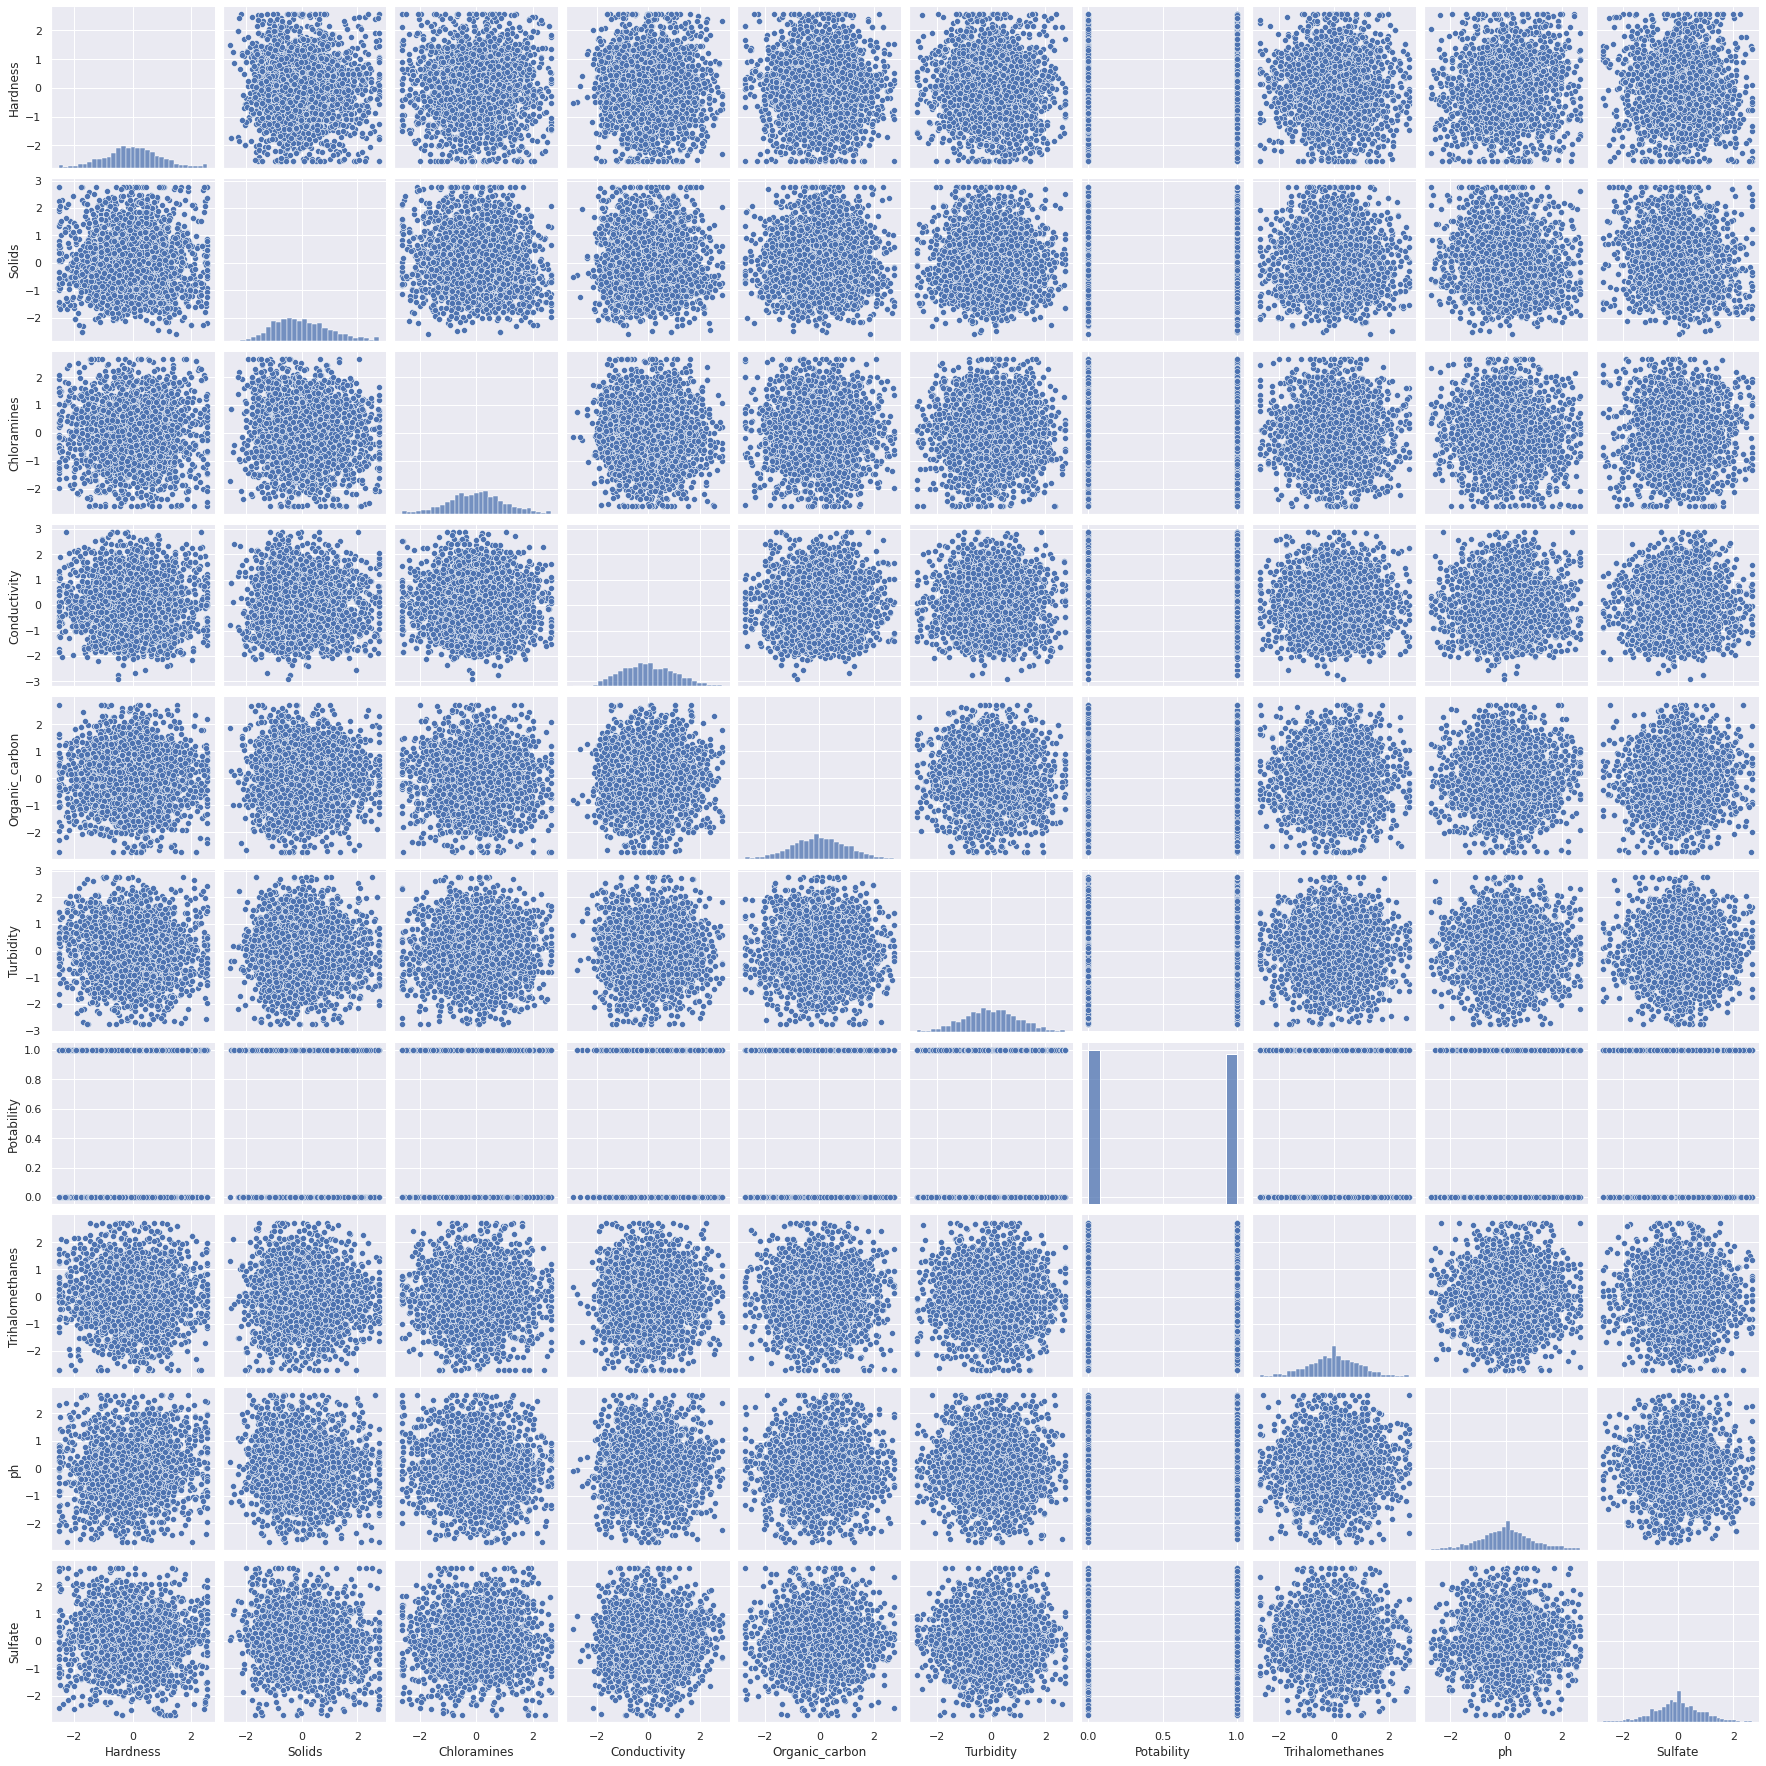

In [44]:
sns.pairplot(X_train.drop(drop_for_plot,axis=1))